In [123]:
import numpy as np
import random

num_states = 1
num_actions = 2

def make_episode(policy):
    states = [0]
    actions = []
    rewards = []
    while True:
        action = np.random.choice(range(num_actions),p=policy[0])
        actions.append(action)
        if action == 0:
            if random.random() < 0.9:
                rewards.append(0)
                states.append(0)
            else:
                rewards.append(1.0)
                break
        else:
            rewards.append(0)
            break
    return states, actions, rewards

policy_pi = np.zeros((num_states, num_actions),dtype=float)
policy_b = np.zeros((num_states, num_actions),dtype=float)
policy_pi[0] = (1.0, 0.0)
policy_b[0] = (0.5,0.5)

def monte_carlo_action_value_ordinary_importance_sampling_first_visit(num_episodes):
    all_lefe_values = np.zeros(num_episodes,dtype=float)
    gamma = 1.0
    values = np.zeros(num_states,dtype=float)
    counts = np.zeros(num_states,dtype=int)
    tmp = 0
    for episode in range(num_episodes):
        states, actions, rewards = make_episode(policy_b)
        episode_len = len(rewards)
        gs = np.zeros(episode_len)
        ws = np.zeros(episode_len)
        g = 0.0
        w = 1.0
        for t in range(episode_len -1, -1, -1):
            state = states[t]
            action = actions[t]
            reward = rewards[t]
            index = (state, action)
            g = reward + gamma * g
            w *= policy_pi[index]/policy_b[index]
            gs[t] = g
            ws[t] = w
        access = np.zeros(num_states, dtype=bool)
        for t in range(0, episode_len):
            state = states[t]
            g = gs[t]
            w = ws[t]
            if not access[state]:
                access[state] = True
                counts[state] += 1
                values[state] += (g*w - values[state])/counts[state]
                #if g !=0:
                    #print(episode_len, g, w)
                #print(g,w,counts[state],values[state])
            
        all_lefe_values[episode] = values[0]
    #print(tmp)
    return all_lefe_values


    

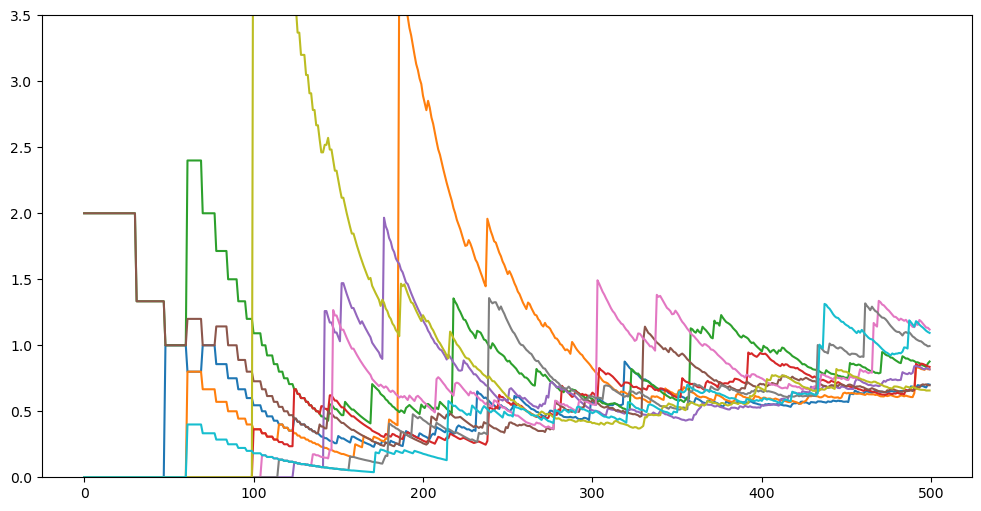

In [134]:
import matplotlib.pyplot as plt
import math
#np.random.choice?
num_episodes = 100000
num_samples = 500
step = math.log(num_episodes)/num_samples
samples = [int(math.exp(n*step)) for n in range(num_samples)]

plt.figure(figsize=(12, 6))
plt.ylim(0,3.5)
for n in range(10):
    values = monte_carlo_action_value_ordinary_importance_sampling_first_visit(num_episodes)
    samples_values = values[samples]
    plt.plot(range(num_samples),samples_values)
